In [ ]:
from google.colab import files

In [ ]:


imported=files.upload()

Saving jalshakti (1)[1].txt to jalshakti (1)[1].txt


In [ ]:
import pandas as pd

In [ ]:
df5=pd.read_csv("jalshakti (1)[1].txt",sep='/t',header=None)
df5=df5.rename(columns={0:'messages'})
df5['target']='ham'

<ipython-input-332-28dd4696533e>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df5=pd.read_csv("jalshakti (1)[1].txt",sep='/t',header=None)


In [ ]:
df=pd.read_csv("sihhd.txt",sep='/t',header=None)

<ipython-input-333-85b4957eaa6b>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df=pd.read_csv("sihhd.txt",sep='/t',header=None)


In [ ]:

df.shape


(910, 1)

In [ ]:
df.describe()

,0
count,910
unique,909
top,The darkness in our neighborhood is a real con...
freq,2


In [ ]:
duplicated_row=df[df.duplicated()]

In [ ]:
duplicated_row

,0
668,The darkness in our neighborhood is a real con...


In [ ]:
df

,0
0,I am writing to express my deep concern about ...
1,The sudden and rather dramatic surge in toll f...
2,It is becoming increasingly difficult for indi...
3,While I understand the importance of generatin...
4,I respectfully request that the government und...
...,...
905,Residents have expressed growing frustration o...
906,The roads in our region have fallen into a sta...
907,The road conditions are an issue of paramount ...
908,I would appreciate your prompt attention to th...


In [ ]:
df2=df.rename(columns={0:'messages'})
df2

,messages
0,I am writing to express my deep concern about ...
1,The sudden and rather dramatic surge in toll f...
2,It is becoming increasingly difficult for indi...
3,While I understand the importance of generatin...
4,I respectfully request that the government und...
...,...
905,Residents have expressed growing frustration o...
906,The roads in our region have fallen into a sta...
907,The road conditions are an issue of paramount ...
908,I would appreciate your prompt attention to th...


In [ ]:
df2['target']='ham'



In [ ]:
df2

,messages,target
0,I am writing to express my deep concern about ...,ham
1,The sudden and rather dramatic surge in toll f...,ham
2,It is becoming increasingly difficult for indi...,ham
3,While I understand the importance of generatin...,ham
4,I respectfully request that the government und...,ham
...,...,...
905,Residents have expressed growing frustration o...,ham
906,The roads in our region have fallen into a sta...,ham
907,The road conditions are an issue of paramount ...,ham
908,I would appreciate your prompt attention to th...,ham


In [ ]:
df2.describe()

,messages,target
count,910,910
unique,909,1
top,The darkness in our neighborhood is a real con...,ham
freq,2,910


In [ ]:
df6=df2.append(df5, ignore_index=True)


<ipython-input-343-ad60fea09a45>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df6=df2.append(df5, ignore_index=True)


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline
# library for train test split
from sklearn.model_selection import train_test_split
# deep learning libraries for text pre-processing
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
# Modeling
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense, Dropout, LSTM, Bidirectional

In [ ]:
ham_msg = df2['messages']
# Create numpy list to visualize using wordcloud
ham_msg_text = " ".join(ham_msg.to_numpy().tolist())

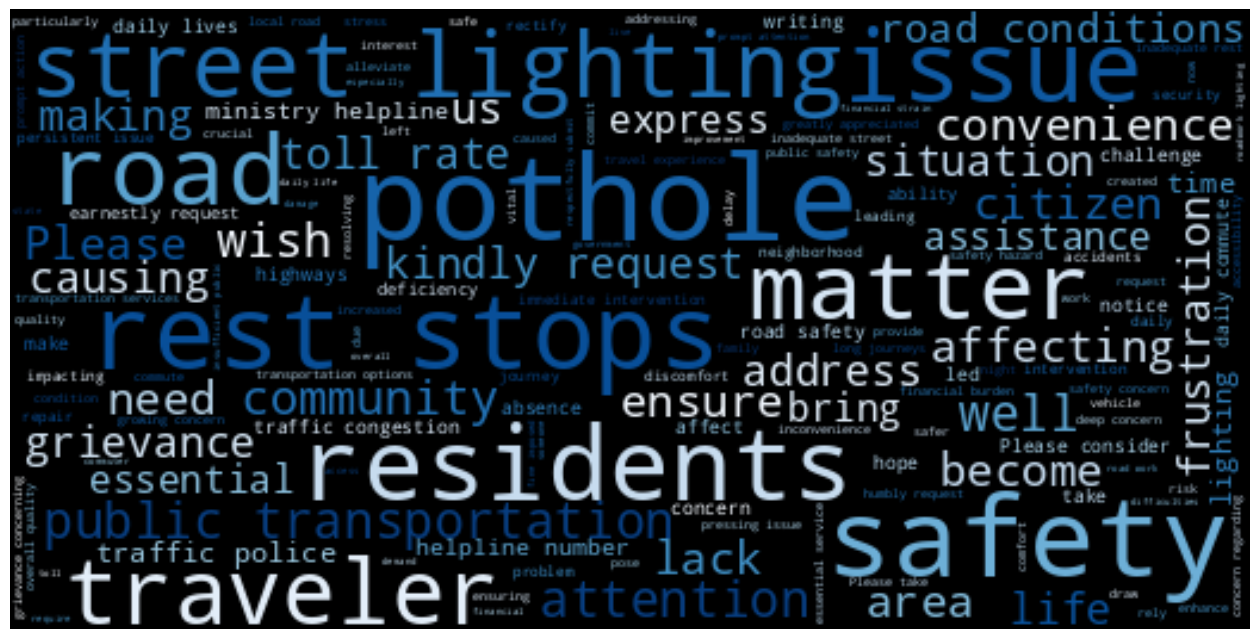

In [ ]:
ham_msg_cloud = WordCloud(width =520, height =260, stopwords=STOPWORDS,max_font_size=50, background_color ="black", colormap='Blues').generate(ham_msg_text)
plt.figure(figsize=(16,10))
plt.imshow(ham_msg_cloud, interpolation='bilinear')
plt.axis('off') # turn off axis
plt.show()

In [ ]:
df3=pd.read_csv("spam22.txt",sep='/t',header=None)

<ipython-input-347-93bf6c3e5704>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df3=pd.read_csv("spam22.txt",sep='/t',header=None)


In [ ]:
df3['target']='spam'


In [ ]:
df3=df3.rename(columns={0:'messages'})

In [ ]:
df3

,messages,target
0,In a world where bubblegum grows on trees and ...,spam
1,Picture a universe where rainbows are highways...,spam
2,"Once upon a whimsical Tuesday, a teapot sang o...",spam
3,Deep within the enchanted labyrinth of Wibbly-...,spam
4,"In the town of Quirkville, it's perfectly norm...",spam
...,...,...
922,Your success is our mission.,spam
923,Join our community of winners and start living...,spam
924,Our system is designed to help you achieve the...,spam
925,Transform your life and secure your financial ...,spam


In [ ]:
df4=df6.append(df3, ignore_index=True)

<ipython-input-351-963956685f9a>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df4=df6.append(df3, ignore_index=True)


In [ ]:
df4

,messages,target
0,I am writing to express my deep concern about ...,ham
1,The sudden and rather dramatic surge in toll f...,ham
2,It is becoming increasingly difficult for indi...,ham
3,While I understand the importance of generatin...,ham
4,I respectfully request that the government und...,ham
...,...,...
2913,Your success is our mission.,spam
2914,Join our community of winners and start living...,spam
2915,Our system is designed to help you achieve the...,spam
2916,Transform your life and secure your financial ...,spam


In [ ]:


df4=df4.sample(frac=1)

In [ ]:
df4

,messages,target
2196,"As our lucky winner, you're entitled to a host...",spam
549,I'm writing to request better street lighting ...,ham
2037,"Once, I crossed paths with a talking pineapple...",spam
558,The current state of street lighting in our ne...,ham
179,The sorry state of our roads is beyond compreh...,ham
...,...,...
992,"""Our households are grappling with the problem...",ham
1327,"""Dear authorities, we are deeply concerned abo...",ham
2733,Looking for exclusive deals on tech gadgets? D...,spam
1480,"""I can't take it anymore—the river near our ho...",ham


In [ ]:
ham_msg = df4[df4.target=='ham']
spam_msg= df4[df4.target=='spam']
ham_msg_text = " ".join(ham_msg.messages.to_numpy().tolist())
spam_msg_text = " ".join(spam_msg.messages.to_numpy().tolist())


In [ ]:

df4.groupby('target').describe().T

target                                                         ham  \
messages count                                                1991   
         unique                                               1943   
         top     "I find it troubling that the inefficiency of ...   
         freq                                                    3   

target                                                        spam  
messages count                                                 927  
         unique                                                229  
         top     As our lucky winner, you're entitled to a host...  
         freq                                                    6

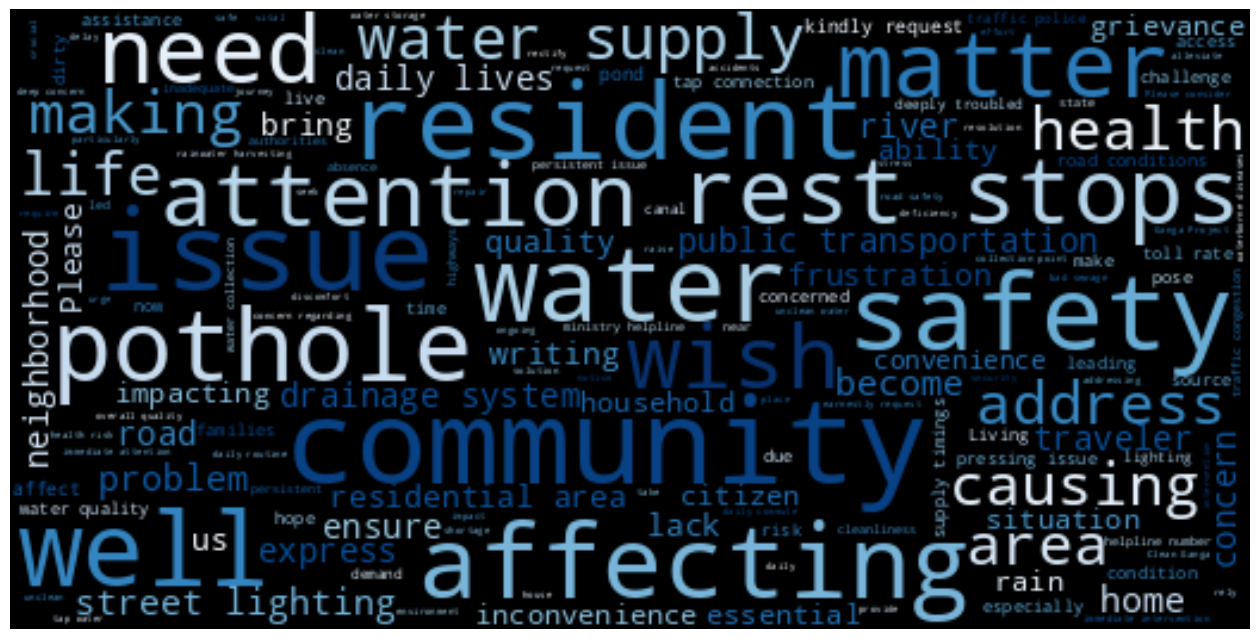

In [ ]:
ham_msg_cloud = WordCloud(width =520, height =260, stopwords=STOPWORDS,max_font_size=50, background_color ="black", colormap='Blues').generate(ham_msg_text)
plt.figure(figsize=(16,10))
plt.imshow(ham_msg_cloud, interpolation='bilinear')
plt.axis('off') # turn off axis
plt.show()

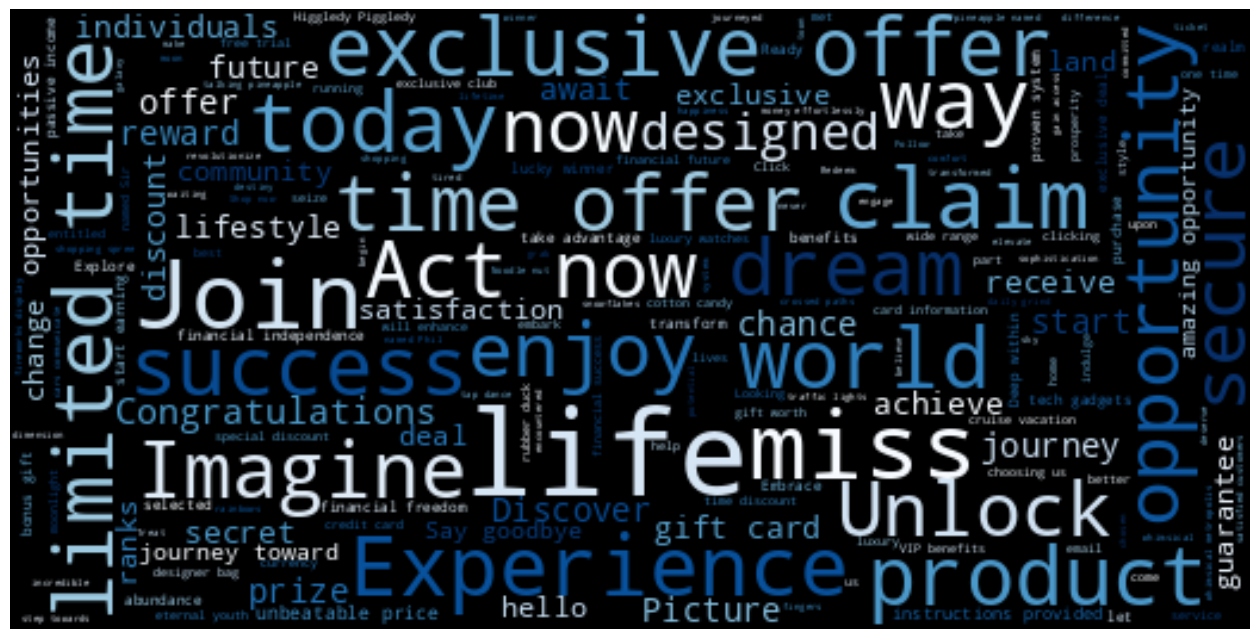

In [ ]:
spam_msg_cloud = WordCloud(width =520, height =260, stopwords=STOPWORDS,max_font_size=50, background_color ="black", colormap='Blues').generate(spam_msg_text)
plt.figure(figsize=(16,10))
plt.imshow(spam_msg_cloud, interpolation='bilinear')
plt.axis('off') # turn off axis
plt.show()

In [ ]:
ham_msg_df = ham_msg.sample(n = len(spam_msg), random_state = 44, replace='true')
spam_msg_df = spam_msg
print(ham_msg_df.shape, spam_msg_df.shape)


(927, 2) (927, 2)


<ipython-input-360-9d565ece2ed5>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  msg_df = ham_msg_df.append(spam_msg_df).reset_index(drop=True)


Text(0.5, 0, 'Message types')

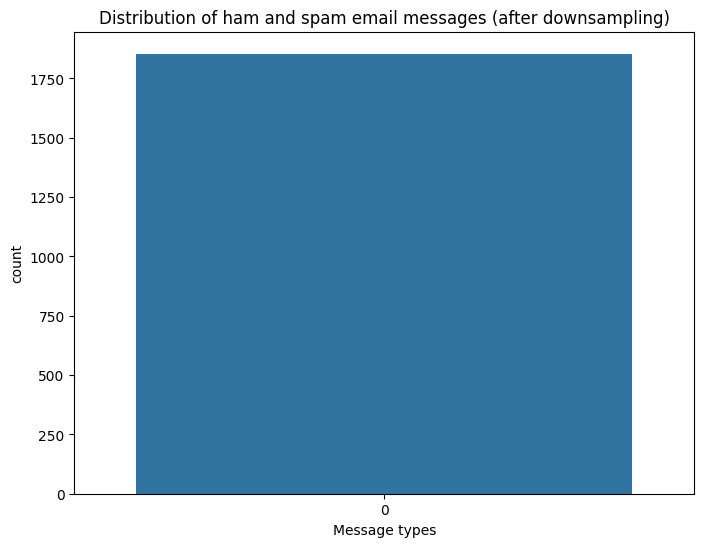

In [ ]:
msg_df = ham_msg_df.append(spam_msg_df).reset_index(drop=True)
msg_df['msg_type']= msg_df['target'].map({'ham': 0, 'spam': 1})
msg_label = msg_df['msg_type'].values
plt.figure(figsize=(8,6))
sns.countplot(msg_df.msg_type)
plt.title('Distribution of ham and spam email messages (after downsampling)')
plt.xlabel('Message types')

In [ ]:
msg_df['msg_type']= msg_df['target'].map({'ham': 0, 'spam': 1})
msg_label = msg_df['msg_type'].values
msg_df



,messages,target,msg_type
0,"""I'm deeply troubled by the water crisis, and ...",ham,0
1,"""Our streets turn into big pools of water when...",ham,0
2,"""The place where we draw water from our well i...",ham,0
3,You won't believe the chaos at the toll booths...,ham,0
4,It feels like these potholes are everywhere on...,ham,0
...,...,...,...
1849,Picture a universe where rainbows are highways...,spam,1
1850,"At our online store, you'll find an extensive ...",spam,1
1851,Our products and opportunities are tailored to...,spam,1
1852,Join the ranks of successful entrepreneurs and...,spam,1


46.55951783023606

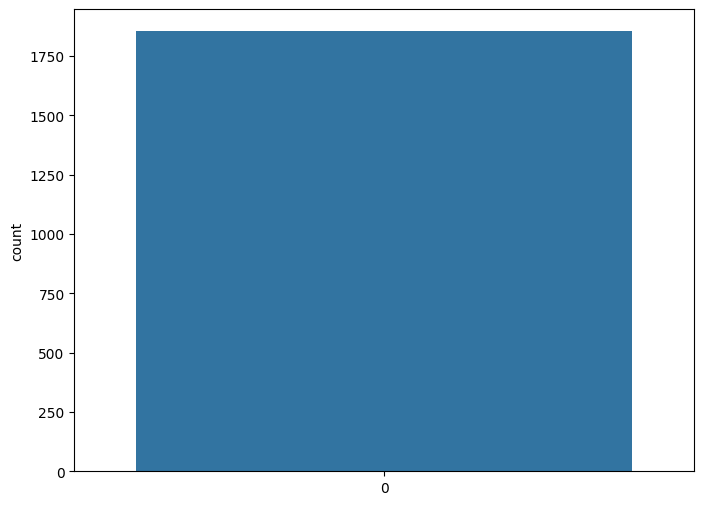

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(msg_df.msg_type)
# Percentage of spam messages
(len(spam_msg)/len(ham_msg))*100

In [ ]:
msg_df

,messages,target,msg_type
0,"""I'm deeply troubled by the water crisis, and ...",ham,0
1,"""Our streets turn into big pools of water when...",ham,0
2,"""The place where we draw water from our well i...",ham,0
3,You won't believe the chaos at the toll booths...,ham,0
4,It feels like these potholes are everywhere on...,ham,0
...,...,...,...
1849,Picture a universe where rainbows are highways...,spam,1
1850,"At our online store, you'll find an extensive ...",spam,1
1851,Our products and opportunities are tailored to...,spam,1
1852,Join the ranks of successful entrepreneurs and...,spam,1


In [ ]:
msg_label = msg_df['msg_type'].values
msg_label

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
train_msg, test_msg, train_labels, test_labels = train_test_split(msg_df['messages'], msg_label, test_size=0.2, random_state=434)

In [ ]:
max_len = 50
trunc_type = "post"
padding_type = "post"
oov_tok = "<OOV>"
vocab_size = 500
tokenizer = Tokenizer(num_words = vocab_size, char_level=False, oov_token = oov_tok)
tokenizer.fit_on_texts(train_msg)

In [ ]:
tokenizer = Tokenizer(num_words = vocab_size, char_level=False, oov_token = oov_tok)
tokenizer.fit_on_texts(train_msg)

In [ ]:
word_index = tokenizer.word_index
word_index

{'<OOV>': 1,
 'the': 2,
 'and': 3,
 'to': 4,
 'our': 5,
 'of': 6,
 'a': 7,
 'your': 8,
 'in': 9,
 'for': 10,
 'is': 11,
 'i': 12,
 'with': 13,
 'water': 14,
 'that': 15,
 'you': 16,
 'this': 17,
 'on': 18,
 'we': 19,
 'are': 20,
 'it': 21,
 'has': 22,
 "it's": 23,
 'life': 24,
 'which': 25,
 'by': 26,
 'issue': 27,
 'safety': 28,
 'my': 29,
 'have': 30,
 'about': 31,
 'as': 32,
 'daily': 33,
 'concern': 34,
 'community': 35,
 'residents': 36,
 'well': 37,
 'where': 38,
 'causing': 39,
 'financial': 40,
 'an': 41,
 'being': 42,
 'who': 43,
 'time': 44,
 'system': 45,
 'affecting': 46,
 'from': 47,
 'please': 48,
 'not': 49,
 'matter': 50,
 'now': 51,
 'quality': 52,
 'lighting': 53,
 'exclusive': 54,
 'like': 55,
 'traffic': 56,
 'been': 57,
 'toll': 58,
 "don't": 59,
 'attention': 60,
 'request': 61,
 'making': 62,
 'lives': 63,
 'potholes': 64,
 'area': 65,
 'roads': 66,
 'become': 67,
 'during': 68,
 'health': 69,
 'offer': 70,
 'when': 71,
 'river': 72,
 "i'm": 73,
 'us': 74,
 'thei

In [ ]:
training_sequences = tokenizer.texts_to_sequences(train_msg)
training_padded = pad_sequences (training_sequences, maxlen = max_len, padding = padding_type, truncating = trunc_type )
testing_sequences = tokenizer.texts_to_sequences(test_msg)
testing_padded = pad_sequences(testing_sequences, maxlen = max_len,
padding = padding_type, truncating = trunc_type)
testing_padded

array([[ 27,  12,   1, ...,   0,   0,   0],
       [  2, 131,   1, ...,   0,   0,   0],
       [  5,   1, 101, ...,   0,   0,   0],
       ...,
       [  1,   1, 311, ...,   0,   0,   0],
       [ 59,  78,   1, ...,   0,   0,   0],
       [ 82,   1,   7, ...,   0,   0,   0]], dtype=int32)

In [ ]:
vocab_size = 500 # As defined earlier
embeding_dim = 16
drop_value = 0.2 # dropout
n_dense = 24

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, embeding_dim, input_length=max_len))
model.add(GlobalAveragePooling1D())
model.add(Dense(24, activation='relu'))
model.add(Dropout(drop_value))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[tf.keras.metrics.BinaryAccuracy(name="binary_accuracy", dtype=None, threshold=0.5)])

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 50, 16)            8000      
                                                                 
 global_average_pooling1d_2  (None, 16)                0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_9 (Dense)             (None, 24)                408       
                                                                 
 dropout_2 (Dropout)         (None, 24)                0         
                                                                 
 dense_10 (Dense)            (None, 1)                 25        
                                                                 
Total params: 8433 (32.94 KB)
Trainable params: 8433 (32.94 KB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [ ]:
num_epochs = 30
early_stop = EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(training_padded, train_labels, epochs=num_epochs, validation_data=(testing_padded, test_labels),callbacks =[early_stop], verbose=2)


Epoch 1/30
47/47 - 1s - loss: 0.6876 - binary_accuracy: 0.6440 - val_loss: 0.6812 - val_binary_accuracy: 0.7385 - 1s/epoch - 24ms/step
Epoch 2/30
47/47 - 0s - loss: 0.6620 - binary_accuracy: 0.8011 - val_loss: 0.6377 - val_binary_accuracy: 0.8140 - 138ms/epoch - 3ms/step
Epoch 3/30
47/47 - 0s - loss: 0.5913 - binary_accuracy: 0.8550 - val_loss: 0.5491 - val_binary_accuracy: 0.8491 - 173ms/epoch - 4ms/step
Epoch 4/30
47/47 - 0s - loss: 0.4745 - binary_accuracy: 0.8881 - val_loss: 0.4250 - val_binary_accuracy: 0.8814 - 134ms/epoch - 3ms/step
Epoch 5/30
47/47 - 0s - loss: 0.3446 - binary_accuracy: 0.9225 - val_loss: 0.3036 - val_binary_accuracy: 0.9191 - 131ms/epoch - 3ms/step
Epoch 6/30
47/47 - 0s - loss: 0.2366 - binary_accuracy: 0.9494 - val_loss: 0.2037 - val_binary_accuracy: 0.9542 - 135ms/epoch - 3ms/step
Epoch 7/30
47/47 - 0s - loss: 0.1661 - binary_accuracy: 0.9730 - val_loss: 0.1401 - val_binary_accuracy: 0.9677 - 139ms/epoch - 3ms/step
Epoch 8/30
47/47 - 0s - loss: 0.1154 - bina

In [ ]:
n_lstm = 6
drop_lstm =0.2

In [ ]:

model1 = Sequential()
model1.add(Embedding(vocab_size, embeding_dim, input_length=max_len))
model1.add(LSTM(n_lstm, dropout=drop_lstm, return_sequences=True))
# model1.add(LSTM(6, dropout=drop_lstm, return_sequences=True))
model1.add(Dense(1, activation='sigmoid'))

In [ ]:

model1.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
y_train = np.asarray(train_labels).astype('float32').reshape((-1,1))
y_test = np.asarray(test_labels).astype('float32').reshape((-1,1))



In [ ]:

num_epochs = 8
early_stop = EarlyStopping(monitor='val_loss', patience=2)
history = model1.fit(training_padded, y_train, epochs=num_epochs, batch_size=30)

Epoch 1/8
50/50 [==============================] - 4s 22ms/step - loss: 0.6845 - accuracy: 0.6382
Epoch 2/8
50/50 [==============================] - 1s 21ms/step - loss: 0.5868 - accuracy: 0.7573
Epoch 3/8
50/50 [==============================] - 1s 22ms/step - loss: 0.3178 - accuracy: 0.9802
Epoch 4/8
50/50 [==============================] - 1s 28ms/step - loss: 0.2146 - accuracy: 0.9890
Epoch 5/8
50/50 [==============================] - 2s 33ms/step - loss: 0.1621 - accuracy: 0.9898
Epoch 6/8
50/50 [==============================] - 1s 26ms/step - loss: 0.1285 - accuracy: 0.9905
Epoch 7/8
50/50 [==============================] - 1s 22ms/step - loss: 0.1027 - accuracy: 0.9919
Epoch 8/8
50/50 [==============================] - 1s 22ms/step - loss: 0.0858 - accuracy: 0.9923


In [ ]:

predict_msg = ['i am a very random message okay bye']

In [ ]:
def predict_spam(predict_msg):
    tokenizer = Tokenizer(num_words=50, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
    new_seq = tokenizer.texts_to_sequences(predict_msg)
    padded = pad_sequences(new_seq, maxlen =max_len,
                      padding = padding_type,
                      truncating=trunc_type)
    a=model1.predict(padded)
    b=a[0][-1]
    if b<0.5:
      return b,'ham message'
    else:
      return b,'spam message'



In [ ]:



predict_spam(predict_msg)

1/1 [==============================] - 0s 28ms/step


(array([0.9581409], dtype=float32), 'spam message')

In [ ]:
model2 = Sequential()
model2.add(Embedding(vocab_size, embeding_dim, input_length=max_len))
model2.add(Bidirectional(LSTM(n_lstm, dropout=drop_lstm, return_sequences=True)))
model2.add(Dense(1, activation='sigmoid'))

In [ ]:
model2.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [ ]:
num_epochs = 30
early_stop = EarlyStopping(monitor='val_loss', patience=2)
history = model2.fit(training_padded, y_train, epochs=num_epochs, batch_size=50)


Epoch 1/30
30/30 [==============================] - 6s 43ms/step - loss: 0.6644 - accuracy: 0.6811
Epoch 2/30
30/30 [==============================] - 1s 44ms/step - loss: 0.4340 - accuracy: 0.8412
Epoch 3/30
30/30 [==============================] - 2s 76ms/step - loss: 0.1283 - accuracy: 0.9844
Epoch 4/30
30/30 [==============================] - 2s 58ms/step - loss: 0.0704 - accuracy: 0.9891
Epoch 5/30
30/30 [==============================] - 1s 42ms/step - loss: 0.0450 - accuracy: 0.9953
Epoch 6/30
30/30 [==============================] - 1s 44ms/step - loss: 0.0298 - accuracy: 0.9980
Epoch 7/30
30/30 [==============================] - 1s 43ms/step - loss: 0.0250 - accuracy: 0.9977
Epoch 8/30
30/30 [==============================] - 1s 44ms/step - loss: 0.0185 - accuracy: 0.9985
Epoch 9/30
30/30 [==============================] - 1s 43ms/step - loss: 0.0163 - accuracy: 0.9984
Epoch 10/30
30/30 [==============================] - 1s 42ms/step - loss: 0.0148 - accuracy: 0.9983
Epoch 11/

In [ ]:
import pickle

pickle.dump(model1,open('model.pkl','wb'))
pickle.dump(predict_spam,open('predict_spam.pkl','wb'))
